## Create fields

In [80]:
N = 256
# distance = Array{Float64, 2}(undef, N, N)
cell = fill(0, N, N)

256×256 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

## Generate random point set

In [53]:
# using Pkg

# Pkg.add("Plots")

In [54]:
using Random
using Plots

In [55]:
M = 50
pts = Random.rand(Float64, (M, 2))

50×2 Array{Float64,2}:
 0.840022   0.881697
 0.379876   0.631519
 0.304174   0.435159
 0.0703836  0.714244
 0.0765282  0.266841
 0.827584   0.958623
 0.570067   0.63598
 0.790737   0.919038
 0.787404   0.0934703
 0.125921   0.0244381
 0.601763   0.259772
 0.867398   0.280728
 0.344247   0.904971
 ⋮          
 0.566679   0.652454
 0.202083   0.892267
 0.886414   0.335793
 0.839781   0.343401
 0.360554   0.1183
 0.138507   0.0798468
 0.746629   0.0772893
 0.0262716  0.935109
 0.667058   0.141747
 0.41703    0.851484
 0.840845   0.89926
 0.1083     0.691183

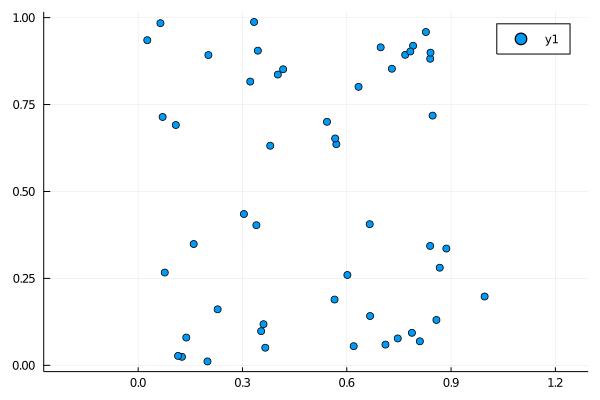

In [294]:
scatter(pts[:,1], pts[:,2], aspect_ratio=1)

## Initialize field

In [81]:
idxn = convert(Array{Int64}, ceil.(pts * N))
idx = CartesianIndex.(eachcol(idxn)...)

50-element Array{CartesianIndex{2},1}:
 CartesianIndex(216, 226)
 CartesianIndex(98, 162)
 CartesianIndex(78, 112)
 CartesianIndex(19, 183)
 CartesianIndex(20, 69)
 CartesianIndex(212, 246)
 CartesianIndex(146, 163)
 CartesianIndex(203, 236)
 CartesianIndex(202, 24)
 CartesianIndex(33, 7)
 CartesianIndex(155, 67)
 CartesianIndex(223, 72)
 CartesianIndex(89, 232)
 ⋮
 CartesianIndex(146, 168)
 CartesianIndex(52, 229)
 CartesianIndex(227, 86)
 CartesianIndex(215, 88)
 CartesianIndex(93, 31)
 CartesianIndex(36, 21)
 CartesianIndex(192, 20)
 CartesianIndex(7, 240)
 CartesianIndex(171, 37)
 CartesianIndex(107, 218)
 CartesianIndex(216, 231)
 CartesianIndex(28, 177)

In [82]:
cell[idx] = 1:M

1:50

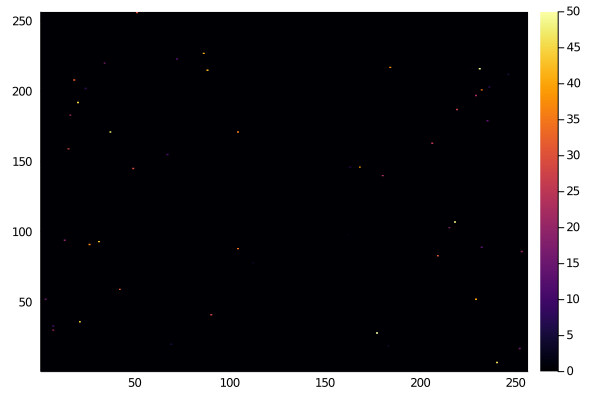

In [84]:
heatmap(cell)

## Check neighbours

In [161]:
neighbours4 = CartesianIndex.(eachcol([-1 0; 0 -1; 1 0; 0 1; 0 0])...)

5-element Array{CartesianIndex{2},1}:
 CartesianIndex(-1, 0)
 CartesianIndex(0, -1)
 CartesianIndex(1, 0)
 CartesianIndex(0, 1)
 CartesianIndex(0, 0)

In [206]:
function modulo_idx(x, shape)
    CartesianIndex(mod.(Tuple(x) .- 1, shape) .+ 1)
end

modulo_idx (generic function with 1 method)

In [251]:
function distance_squared(a, b)
    dist = mod.(b - a .+ 0.5, 1.0) .- 0.5
    sum(dist.^2)
end

function dist_func(pts, pt, loc)
    if pt == 0
        Inf
    else
        distance_squared(pts[pt,:], loc)
    end
end 

dist_func (generic function with 1 method)

In [252]:
function check_pixel(cell, next, home)
    loc = convert(Array{Float64}, [Tuple(home)...]) ./ N
    pt_ids = [cell[modulo_idx(home + n, N)] for n in neighbours4]
    m = argmin([dist_func(pts, pt, loc) for pt in pt_ids])
    next[home] = pt_ids[m]
end

function dist_map(pts, cell)
    (x->begin
            loc = convert(Array{Float64}, [Tuple(x)...]) ./ N
            dist_func(pts, cell[x], loc)
            end).(CartesianIndices(cell))
end

dist_map (generic function with 1 method)

In [253]:
function step(cell, next)
    for home in CartesianIndices(cell)
        check_pixel(cell, next, home)
    end
end

step (generic function with 2 methods)

In [281]:
N = 256
# distance = Array{Float64, 2}(undef, N, N)
cell = fill(0, N, N)
cell[idx] = 1:M

1:50

In [282]:
next = Array{Int64}(undef, N, N)
while next != cell
    step(cell, next)
    cell, next = next, cell
end
# heatmap(dist_map(pts, cell))

In [287]:
?heatmap

search: heatmap heatmap! plots_heatmap plots_heatmap!



```
heatmap(x,y,z)
heatmap!(x,y,z)
```

Plot a heatmap of the rectangular array `z`.

# Example

```julia-repl
julia> heatmap(randn(10,10))
```


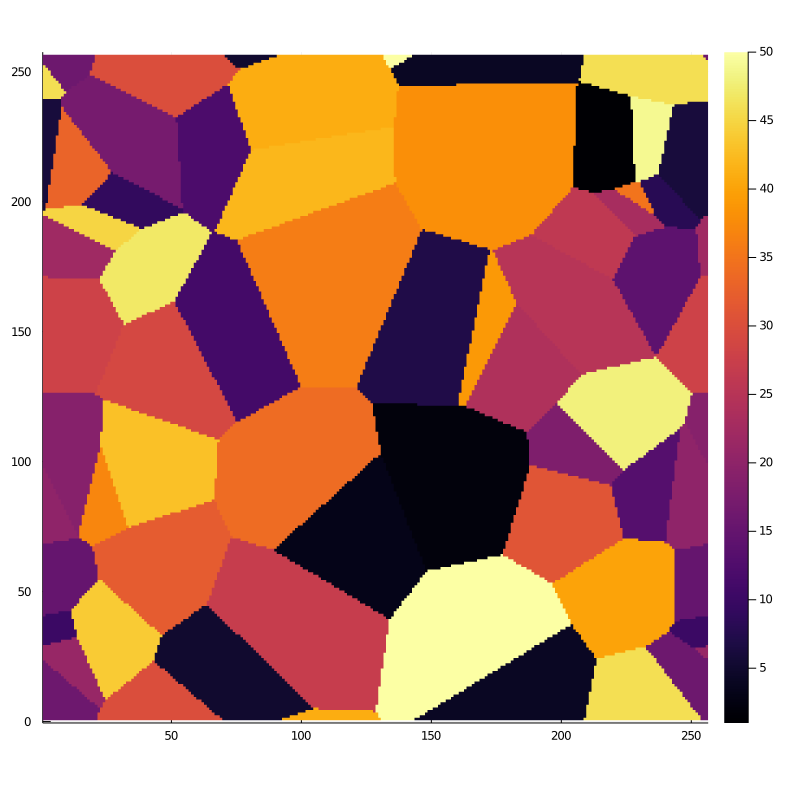

In [291]:
heatmap(cell, aspect_ratio=1, size=(800,800))

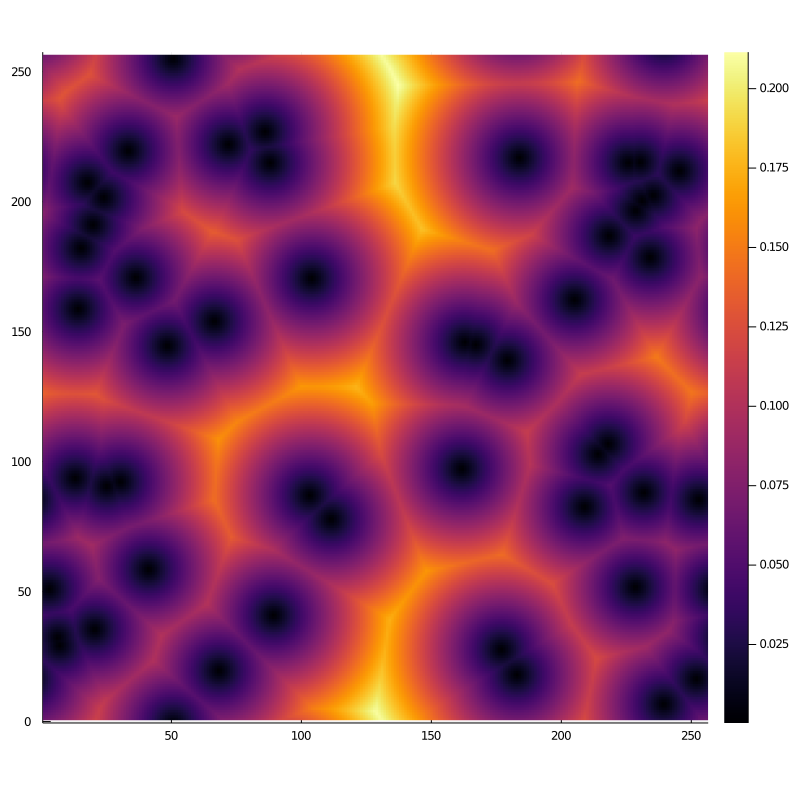

In [292]:
heatmap(sqrt.(dist_map(pts, cell)), size=(800,800), aspect_ratio=1)

In [293]:
savefig("distance-func.png")

In [299]:
d = sqrt.(dist_map(pts, cell)) ;

In [300]:
function ∇²(f)
   ∇²f = zero(f) # initialize to zero since we don't touch the boundaries
   for y = 2:size(f,2)-1, x = 2:size(f,1)-1 # compute ∇²f in interior of f
       ∇²f[x,y] = f[x-1,y] + f[x+1,y] + f[x,y-1] + f[x,y+1] - 4f[x,y]
   end
   return ∇²f
end

∇² (generic function with 1 method)

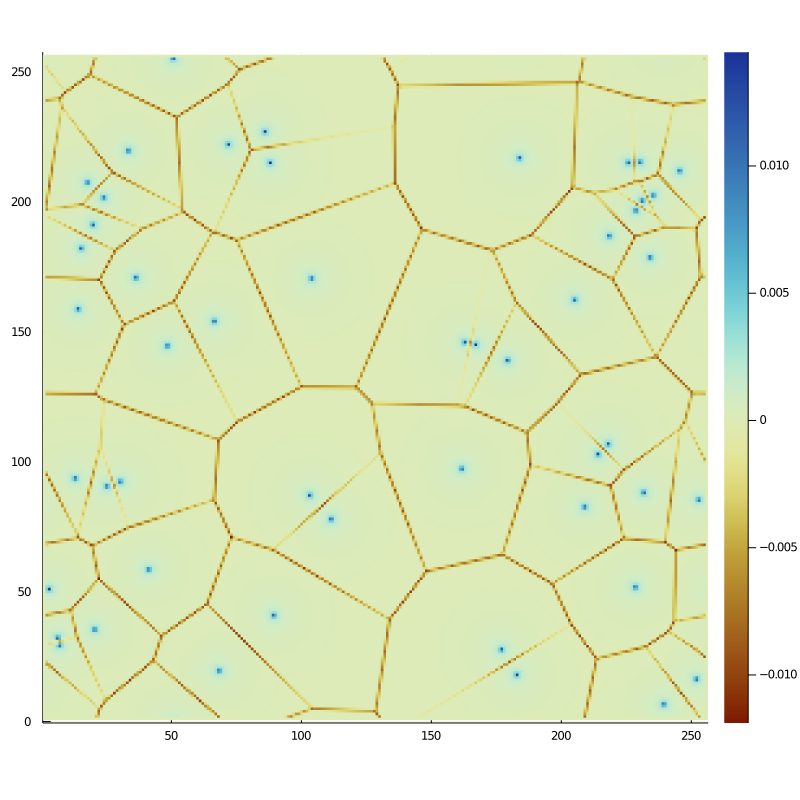

In [307]:
heatmap(∇²(d), color=:roma, size=(800,800), aspect_ratio=1)